1. Опишите теоретическую модель k-средних.
2. Напишите следующий год: сгенерируйте данные в виде набора точек по нескольким классам; выполните классификацию; оцените точность, визуализируйте результат.
3. Опишите метрику для проверки качества алгоритмов регрессии.
4. Опишите технологию масштабирования признаков. Привидите примеры.

# 1. Опишите теоретическую модель k-средних.

Модель решает задачу кластеризации. Обучение без учителя. 

Принцип работы:
1. Распределеям объекты по кластерам
2. Сдвигаем центры кластеров .
3. Повторяем эти шаги несколько раз

Выбор начального положения кластеров (случайно и кучное расположение центров)
Уменьшение метрик расстояния

Иерархическая кластеризация (Дивизионная и Агломеративная) >

Дендрограмма 

DBSCAN (коротко)

# 2. Напишите следующий код: сгенерируйте данные в виде набора точек по нескольким классам; выполните классификацию; оцените точность, визуализируйте результат.

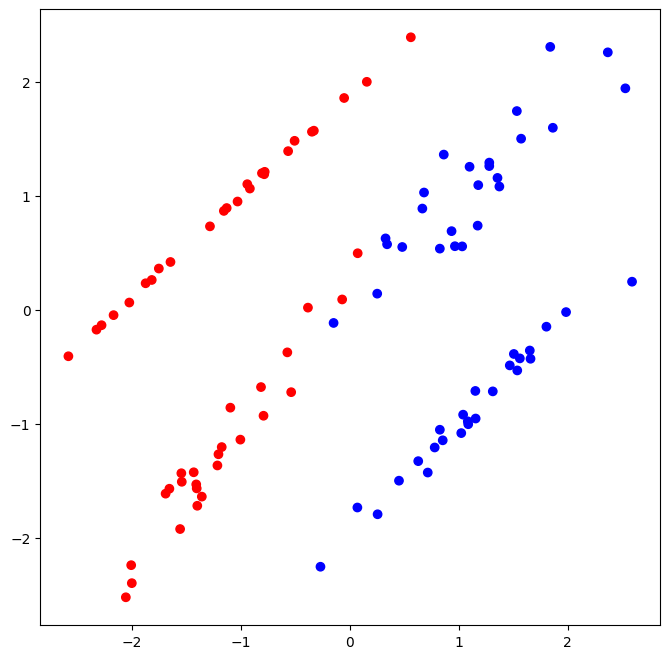

In [100]:
from sklearn import datasets
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

# сгеренируем данные
classes = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)

# и изобразим их на графике
colors = ListedColormap(['red', 'blue'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)

plt.show()

In [101]:
# перемешивание датасета
np.random.seed(12) # это число позволяет постоянно получать одну и ту же "случайность"
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]

In [102]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

Итоговый вектор весов w: [ 3.63995957 -0.59528219]
Точность на обучающей выборке: 98.571%
Точность на тестовой выборке: 96.667%


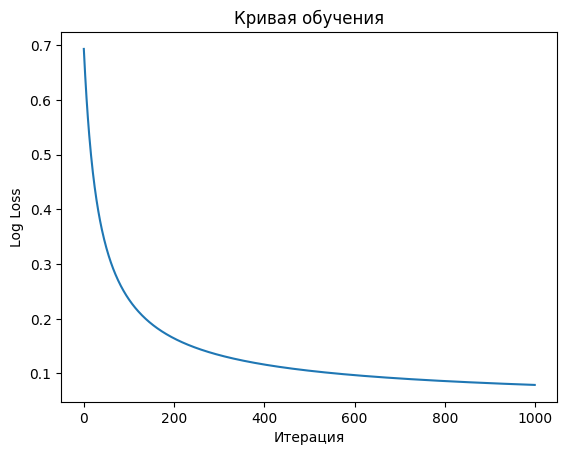

In [103]:
# Логистическая регрессия
def sigmoid(z):
    """Сигмоидная функция"""
    return 1 / (1 + np.exp(-z))

def log_loss(w, X, y):
    """Вычисление логистической функции потерь и градиента"""
    m = X.shape[0]
    predictions = sigmoid(X.dot(w))
    loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    grad = X.T.dot(predictions - y) / m
    return loss, grad

def optimize(w, X, y, n_iterations, eta):
    """Оптимизация весов с помощью градиентного спуска"""
    losses = []
    for i in range(n_iterations):
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad
        losses.append(loss)
    return w, losses

def predict(w, X, threshold=0.5):
    """Предсказание классов"""
    probabilities = sigmoid(X.dot(w))
    return (probabilities >= threshold).astype(int)

# Инициализация весов
w0 = np.zeros((X_train.shape[1], 1))  # Веса соответствуют количеству признаков
n_iterations = 1000
eta = 0.05

# Оптимизация весов
w, losses = optimize(w0, X_train, y_train, n_iterations, eta)

# Предсказания
y_pred_train = predict(w, X_train)
y_pred_test = predict(w, X_test)

# Точность
train_accuracy = 100 * np.mean(y_pred_train == y_train)
test_accuracy = 100 * np.mean(y_pred_test == y_test)

print(f"Итоговый вектор весов w: {w.ravel()}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}%")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}%")

# График потерь
plt.plot(losses)
plt.title("Кривая обучения")
plt.xlabel("Итерация")
plt.ylabel("Log Loss")
plt.show()

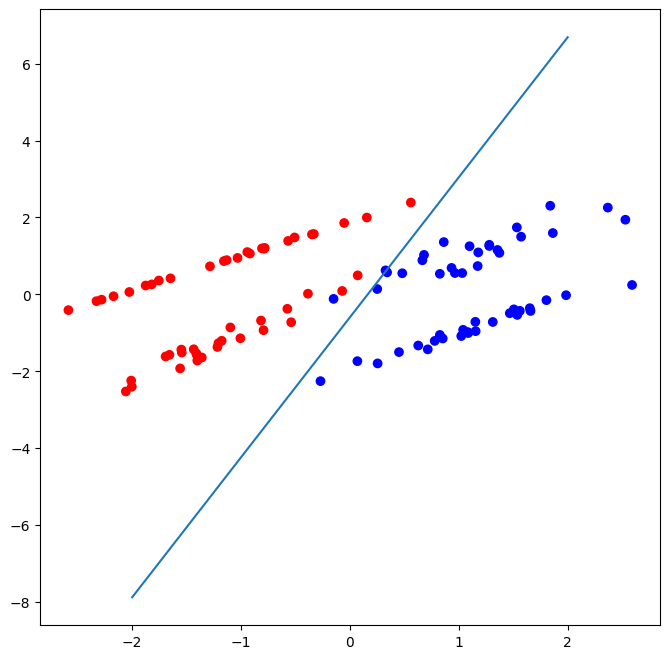

In [104]:
data = np.linspace(-2, 2, 100)

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.plot(data, w[0,0]*data+w[1,0])

plt.show()

# 3. Опишите метрику для проверки качества алгоритмов регрессии.

В рамках решения задачи оптимизации обычно ставится задача достижения минимального значения функционала ошибки.

1. MAE, среднее абсолютное значение
2. MSE, среднее квадратичное значение
3. Коэффициент детерминации R2, варьируется в интервале между 0 и 1 и обозначает объяснительную мощность линейной регрессионной модели. Обычно, чем ближе 
 к 1, тем лучше линия регрессии подогнана к точкам данных и больше изменчивости в 
 объясняется независимой переменной.

$$Q(a,x) = MAE = \frac{1}{l}\sum^{l}_{i=1}|a(x_{i})-y_{i}|$$

$$Q(a,x) = MSE = \frac{1}{l}\sum^{l}_{i=1}(a(x_{i})-y_{i})^{2}$$

In [105]:
def score(Y_pred, Y_test):
    u = ((Y_test - Y_pred)**2).sum()
    v = ((Y_test - Y_test.mean())**2).sum()
    r = 1 - u/v
    return r

# 4. Опишите технологию масштабирования признаков. Привидите примеры.

Масштабированием называется общий процесс изменения диапазона признака. (возраст и зарплата)
Vетоды линейной регрессии и «случайного леса» не требует масштабирования признаков, лучше не пренебрегать этим этапом при сравнении нескольких алгоритмов.

Есть два способа масштабирования: Нормализация и Стандартизация

Нормализация
В данном случае все значения будут находиться в диапазоне от 0 до 1. Дискретные бинарные значения определяются как 0 и 1.
Расчёт нового значения происходит по формуле:
$$X_{norm} = (X - X_{min}) / (X_{max} - X_{min}) $$

Стандартизация
Масштабирует значения с учетом стандартного отклонения. Если стандартное отклонение функций другое, их диапазон также будет отличаться друг от друга. Это снижает влияние выбросов в элементах. В следующей формуле стандартизации среднее значение показано как mu, а стандартное отклонение показано как sigma.
$$X_{std} = (X - \mu) / \sigma$$
 
Стандартизация приводит все исходные значения набора данных, независимо от их начальных распределений и единиц измерения, к набору значений из распределения с нулевым средним значением и единичным стандартным отклонением.

In [106]:
import pandas as pd
import re

df = pd.read_csv('Price_euros_train.csv',encoding='ISO-8859-1')

In [107]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
1,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
2,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
3,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
4,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97


In [108]:
def ext_res(resolution):
    match = re.findall(r'\d+x\d+', resolution)
    width, height = map(int, match[0].split('x'))
    return pd.Series([width, height])

def ext_cpu(cpu):
    match = re.findall(r'\d+\.?\d*GHz', cpu)
    ans, not_ans = map(str, match[0].split('GHz'))
    return pd.Series([float(ans)])

def convert_to_gb(value, unit):
            if unit.upper() == 'TB':
                return int(value * 1024)
            return int(value)

def find_pattern(string, pattern):
    if re.search(pattern, string):
        object = re.search(pattern, string).group(0).split()[0]
        value = object[:-2]
        unit = object[-2:]
        return convert_to_gb(float(value), unit)
    else:
        return 0

In [109]:
def preprocessing(df):

    df['ScreenResolution'] = df['ScreenResolution'].astype("str")
    df['ScreenResolution'] = df['ScreenResolution'].replace('nan', df['ScreenResolution'].mode()[0])

    df['OpSys'] = df['OpSys'].replace(np.nan, df['OpSys'].mode()[0])
    # df['OpSys'] = df['OpSys'].replace(np.nan, 'No OS')

    df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

    df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
    df['IPS_Panel'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)

    df[['Width', 'Height']]= df['ScreenResolution'].apply(ext_res)
    df['ppi'] = np.sqrt(df['Width']**2 + df['Height']**2)/df['Inches']
    
    df[['Cpu_GHz']] = df['Cpu'].apply(ext_cpu)
    df['Cpu_Company'] = df['Cpu'].replace(to_replace=r'\s+\d+\.?\d*GHz', value='', regex=True).str.extract(r'(.+?)\s')
    
    df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)
    df['Weight'].fillna(round(df['Weight'].mean(), 2), inplace=True)

    pattern_ssd = '\d+\.?\d*\w{2} SSD'
    pattern_hdd = '\d+\.?\d*\w{2} HDD'
    pattern_hybrid = '\d+\.?\d*\w{2} Hybrid'
    pattern_flash = '\d+\.?\d*\w{2} Flash Storage'

    df['SSD'] = df['Memory'].apply(lambda x: find_pattern(x,pattern_ssd))
    df['HDD'] = df['Memory'].apply(lambda x: find_pattern(x,pattern_hdd))
    df['Hybrid'] = df['Memory'].apply(lambda x: find_pattern(x,pattern_hybrid))
    df['Flash Storage'] = df['Memory'].apply(lambda x: find_pattern(x,pattern_flash))

    df['Gpu_Company']=df['Gpu'].str.extract(r'(.+?)\s')
    df['Gpu_model'] = df['Gpu'].str.extract(r'\s(.+)$')
    df['Gpu_model'] = df['Gpu_model'].str.extract(r'^(.+)\s')
    df['Gpu_model'] = df['Gpu_model'].apply(lambda x:'Other' if x not in ['HD Graphics', 'GeForce GTX', 'GeForce', 'Radeon', 'UHD Graphics'] else x)
    
    df = df.drop(['laptop_ID', 'Product', 'ScreenResolution', 'Cpu','Gpu', 'Memory', 'Width', 'Height', 'Inches', 'Company','TypeName','OpSys', 'Cpu_Company','Gpu_Company', 'Gpu_model'], axis=1)

    return df

In [110]:
df = preprocessing(df)
df

,Ram,Weight,Price_euros,Touchscreen,IPS_Panel,ppi,Cpu_GHz,SSD,HDD,Hybrid,Flash Storage
0,8,1.34,898.94,0,0,127.677940,1.8,0,0,0,128
1,16,1.83,2537.45,0,1,220.534624,2.7,512,0,0,0
2,8,1.37,1803.60,0,1,226.983005,3.1,256,0,0,0
3,4,2.10,400.00,0,0,100.454670,3.0,0,500,0,0
4,16,2.04,2139.97,0,1,220.534624,2.2,0,0,0,256
...,...,...,...,...,...,...,...,...,...,...,...
1103,4,2.20,720.32,0,0,100.454670,2.5,0,500,0,0
1104,4,1.80,638.00,1,1,157.350512,2.5,128,0,0,0
1105,2,1.50,229.00,0,0,111.935204,1.6,0,0,0,64
1106,6,2.19,764.00,0,0,100.454670,2.5,0,1024,0,0


In [111]:
df.describe()

,Ram,Weight,Price_euros,Touchscreen,IPS_Panel,ppi,Cpu_GHz,SSD,HDD,Hybrid,Flash Storage
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,8.361011,2.037209,1115.214612,0.144404,0.275271,146.269063,2.295812,181.043321,429.516245,7.851986,4.375451
std,5.075011,0.655140,688.189083,0.351658,0.446852,42.512522,0.508057,184.840530,529.227950,88.029517,29.846760
min,2.000000,0.690000,174.000000,0.000000,0.000000,90.583402,0.900000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.500000,598.000000,0.000000,0.000000,127.335675,2.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,2.040000,959.000000,0.000000,0.000000,141.211998,2.500000,180.000000,0.000000,0.000000,0.000000
75%,8.000000,2.300000,1480.750000,0.000000,1.000000,157.350512,2.700000,256.000000,1024.000000,0.000000,0.000000
max,64.000000,4.600000,5499.000000,1.000000,1.000000,352.465147,3.600000,1024.000000,2048.000000,1024.000000,512.000000


In [112]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

std = StandardScaler()

X_std = std.fit_transform(df)

X_std = pd.DataFrame(X_std, columns=df.columns)
X_std

,Ram,Weight,Price_euros,Touchscreen,IPS_Panel,ppi,Cpu_GHz,SSD,HDD,Hybrid,Flash Storage
0,-0.071167,-1.064694,-0.314408,-0.410824,-0.616300,-0.437507,-0.976340,-0.979899,-0.811957,-0.089237,4.143846
1,1.505896,-0.316425,2.067568,-0.410824,1.622586,1.747699,0.795916,1.791307,-0.811957,-0.089237,-0.146663
2,-0.071167,-1.018882,1.000737,-0.410824,1.622586,1.899450,1.583585,0.405704,-0.811957,-0.089237,-0.146663
3,-0.859699,0.095886,-1.039740,-0.410824,-0.616300,-1.078155,1.386668,-0.979899,0.133242,-0.089237,-0.146663
4,1.505896,0.004261,1.489733,-0.410824,1.622586,1.747699,-0.188671,-0.979899,-0.811957,-0.089237,8.434355
...,...,...,...,...,...,...,...,...,...,...,...
1103,-0.859699,0.248594,-0.574076,-0.410824,-0.616300,-1.078155,0.402081,-0.979899,0.133242,-0.089237,-0.146663
1104,-0.859699,-0.362238,-0.693748,2.434132,1.622586,0.260781,0.402081,-0.287098,-0.811957,-0.089237,-0.146663
1105,-1.253965,-0.820362,-1.288330,-0.410824,-0.616300,-0.807982,-1.370175,-0.979899,-0.811957,-0.089237,1.998591
1106,-0.465433,0.233323,-0.510577,-0.410824,-0.616300,-1.078155,0.402081,-0.979899,1.123811,-0.089237,-0.146663


In [113]:
mmsc = MinMaxScaler()
X_norm = mmsc.fit_transform(df)

X_norm = pd.DataFrame(X_norm, columns=df.columns)

X_norm.describe()

,Ram,Weight,Price_euros,Touchscreen,IPS_Panel,ppi,Cpu_GHz,SSD,HDD,Hybrid,Flash Storage
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,0.102597,0.344555,0.176754,0.144404,0.275271,0.212637,0.516968,0.176800,0.209725,0.007668,0.008546
std,0.081855,0.167555,0.129237,0.351658,0.446852,0.162335,0.188169,0.180508,0.258412,0.085966,0.058294
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.032258,0.207161,0.079624,0.000000,0.000000,0.140339,0.407407,0.000000,0.000000,0.000000,0.000000
50%,0.096774,0.345269,0.147418,0.000000,0.000000,0.193326,0.592593,0.175781,0.000000,0.000000,0.000000
75%,0.096774,0.411765,0.245399,0.000000,1.000000,0.254951,0.666667,0.250000,0.500000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
